In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
train_data = pd.read_csv('new1.csv')
X = train_data.drop(['carid', 'price'], axis=1)
y = train_data['carid']
#拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


NNLS R2 score 0.36595953960911143
OLS R2 score 0.3872007035828091


c:\users\12499\anaconda3\envs\sci\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2105983287344.619, tolerance: 685946498.3431271
  positive,


Text(0, 0.5, 'NNLS regression coefficients')

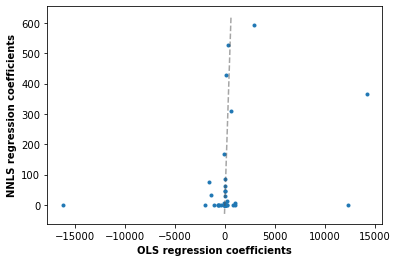

In [8]:
from sklearn.linear_model import LinearRegression
#拟合非负最小二乘
from sklearn.linear_model import Lasso
reg_nnls = Lasso(alpha=0.0001,precompute=True,max_iter=1000,
            positive=True, random_state=9999, selection='random')
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)
# fit an ols
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")
#比较ols和nnls之间回归系数（虚线是恒等关系），非负约束缩小到0。非负最小二乘固有第产生稀疏结果
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")